## Run a quantum circuit on IBM's quantum computer

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, qasm3
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram

## Initiate IBM Quantum service

In [2]:
service = QiskitRuntimeService(filename='./account.json', name='oluwatosin-gmail')

## List all active backends and queued jobs

In [3]:
print("List of backends:\n")
for backend in service.backends():
    properties = backend.properties()
    print(properties.backend_name)
    if (properties):
        print(f"Qubits:  {len(properties.qubits)}")
    else:
        print(f"Simulator")
    print(f"Queued jobs: {backend.status().pending_jobs}\n")

List of backends:

ibm_sherbrooke
Qubits:  127
Queued jobs: 17

ibm_kyiv
Qubits:  127
Queued jobs: 14

ibm_brisbane
Qubits:  127
Queued jobs: 14



## Number of qubits

In [4]:
n = 1

## Quantum and classical register

In [5]:
qreg = QuantumRegister(n)
creg = ClassicalRegister(n)

## Instantiate a circuit object

In [6]:
circ = QuantumCircuit(qreg, creg)

## Build quantum circuit

In [7]:
circ.h(0)
circ.z(0)
circ.h(0)

## Save quantum circuit for future reference

In [8]:
circ_string = qasm3.dumps(circ)
file_name = f"circ.qasm"
with open(f"files/qasm_files/{file_name}", "w") as file:
        file.write(circ_string)

In [9]:
circ.draw('mpl').savefig("files/images/circ.jpg", dpi=500)

## Measure quantum circuit

In [10]:
circ.measure(qreg, creg)

## Select backend with least jobs

In [11]:
backend = service.backend("ibm_kyiv")

## Transpile circuit with backend with least jobs

In [12]:
circ_trans = transpile(circ, backend, optimization_level=3)

## Save transpiled quantum circuit for future reference

In [13]:
circ_trans_string = qasm3.dumps(circ_trans)
file_name = f"circ_trans.qasm"
with open(f"files/qasm_files/{file_name}", "w") as file:
        file.write(circ_trans_string)

In [14]:
circ_trans.draw('mpl').savefig("files/images/circ_trans.jpg", dpi=500)

## Run transpiled quantum circuit

In [16]:
sampler = Sampler(mode=backend)

In [17]:
job = sampler.run([circ_trans], shots=50)

In [18]:
print(f">>> Job ID:     {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID:     cy7286rnrmz00085prb0
>>> Job Status: QUEUED


## Retrieve Results

In [21]:
job.result()[0]

SamplerPubResult(data=DataBin(c0=BitArray(<shape=(), num_shots=50, num_bits=1>)), metadata={'circuit_metadata': {}})

In [22]:
job.result()[0].data['c0'].get_counts()

{'1': 50}

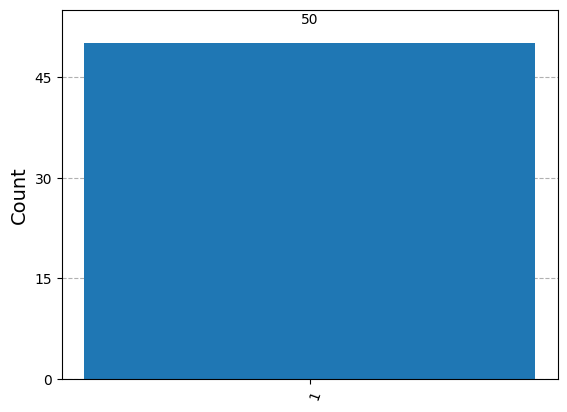

In [23]:
plot_histogram(job.result()[0].data['c0'].get_counts())